# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: Mon, October 24, by 11:59pm</p>


Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Question 1 - Stochastic Gradient Descent (10pts)

### 1:
Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.

$$y_{pred} = w_0 + w_1*x_1 + w_2*(x_1)^2 + w_3*x_2$$

$$E(w_0,w_1,w_2)=\sum _{i=1}^{n}E_{i}(w_0,w_1,w_2)=\sum _{i=1}^{n}\left(w_0 + w_1*x_{1,i} + w_2*(x_{1,i})^2 + w_3*x_{2,i} - y_{act}\right)^{2}$$

$$w_n^{(\tau + 1)}=w_n^{(\tau)}-\eta \nabla E_{i}(w_0,w_1,w_2) = w_n^{(\tau)}-\eta \nabla E_{i}(w_0,w_1,w_2)$$ 

$$ w_n^{(\tau + 1)} =  w_n^{(\tau)} - \eta \frac{\partial}{\partial w_n} E_{i}(w_0,w_1,w_2) $$

$$\frac{\partial}{\partial w_0} E_{i}(w_0,w_1,w_2) = \frac{\partial}{\partial w_0}  \left(w_0 + w_1*x_{1,i} + w_2*(x_{1,i})^2 + w_3*x_{2,i} - y_{act}\right)^{2} = 2*\left(w_0 + w_1*x_{1,i} + w_2*(x_{1,i})^2 + w_3*x_{2,i} - y_{act}\right)$$

$$\frac{\partial}{\partial w_1} E_{i}(w_0,w_1,w_2) = \frac{\partial}{\partial w_1}  \left(w_0 + w_1*x_{1,i} + w_2*(x_{1,i})^2 + w_3*x_{2,i} - y_{act}\right)^{2} = 2*\left(w_0 + w_1*x_{1,i} + w_2*(x_{1,i})^2 + w_3*x_{2,i} - y_{act}\right)*x_{1,i} $$

$$\frac{\partial}{\partial w_2} E_{i}(w_0,w_1,w_2) = \frac{\partial}{\partial w_2}  \left(w_0 + w_1*x_{1,i} + w_2*(x_{1,i})^2 + w_3*x_{2,i} - y_{act}\right)^{2} = 2*\left(w_0 + w_1*x_{1,i} + w_2*(x_{1,i})^2 + w_3*x_{2,i} - y_{act}\right)*2*x_{1,i} $$

$$\frac{\partial}{\partial w_3} E_{i}(w_0,w_1,w_2) = \frac{\partial}{\partial w_3}  \left(w_0 + w_1*x_{1,i} + w_2*(x_{1,i})^2 + w_3*x_{2,i} - y_{act}\right)^{2} = 2*\left(w_0 + w_1*x_{1,i} + w_2*(x_{1,i})^2 + w_3*x_{2,i} - y_{act}\right)*x_{2,i} $$


$$ w_0^{(\tau + 1)} =  w_0^{(\tau)} - \eta * 2*\left(w_0 + w_1*x_{1,i} + w_2*(x_{1,i})^2 + w_3*x_{2,i} - y_{act}\right) $$

$$ w_1^{(\tau + 1)} =  w_1^{(\tau)} - \eta * 2*\left(w_0 + w_1*x_{1,i} + w_2*(x_{1,i})^2 + w_3*x_{2,i} - y_{act}\right)*x_{1,i} $$

$$ w_2^{(\tau + 1)} =  w_2^{(\tau)} - \eta * 4*\left(w_0 + w_1*x_{1,i} + w_2*(x_{1,i})^2 + w_3*x_{2,i} - y_{act}\right)*x_{1,i} $$

$$ w_3^{(\tau + 1)} =  w_3^{(\tau)} - \eta * 2*\left(w_0 + w_1*x_{1,i} + w_2*(x_{1,i})^2 + w_3*x_{2,i} - y_{act}\right)*x_{2,i} $$



### 2: 

Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2$$ Try to format similarly to scikit-learn's models. There should be a _fit_ function that takes parameters X, y, learning rate, and number of iterations, and a _predict_ function that takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .001, .01] . Plot MSE and the $w$ parameters as a function of epoch count.

In [16]:
import numpy as np

def loss_function_base(w0,w1,w2,w3,x1,x2,y_act):
    return 2*(w0 + w1*x1 + w2*(x1**2) + w3*x2 - y_act)

In [157]:
sample.shape

(40, 4)

In [198]:
class GradientDescent:
    
    def fit(self,X,y,learning_rate,epochs,sample_p = 0.5):
        data = np.concatenate((X,y),1)      
        x1_mat = X[:,0]
        x2_mat = X[:,1]
        self.x1 = x1_mat
        self.x2 = x2_mat
        self.y = y
        w0=0
        w1=0
        w2=0
        w3=0
        for itter in range(epochs):
            data = np.concatenate((sample_matrix[:,0:2],sample_matrix[:,2:]),1)
            sample = pd.DataFrame(data)[pd.Series(np.random.rand(40))<sample_p]
            sample.columns=["x1","x2","y"]
            samplex1 = sample["x1"].as_matrix()
            samplex2 = sample["x2"].as_matrix()
            sampley = sample["y"].as_matrix()
            for point in range(len(samplex1)):
                x1 = samplex1[point]
                x2 = samplex2[point]
                y_act = sampley[point]
                w0 = w0 - learning_rate*loss_function_base(w0,w1,w2,w3,x1,x2,y_act)
                w1 = w1 - learning_rate*loss_function_base(w0,w1,w2,w3,x1,x2,y_act)*x1
                w2 = w2 - learning_rate*loss_function_base(w0,w1,w2,w3,x1,x2,y_act)*2*x1
                w3 = w3 - learning_rate*loss_function_base(w0,w1,w2,w3,x1,x2,y_act)*x2

        self.w0=w0
        self.w1=w1
        self.w2=w2
        self.w3=w3
    
    def predict(self,X):
        x1_mat = X[:,0]
        x2_mat = X[:,1]
        y_pred = []
        w0 = self.w0
        w1 = self.w1
        w2 = self.w2
        w3 = self.w3
        for point in range(len(x1_mat)):
            x1 = x1_mat[point]
            x2 = x2_mat[point]
            y = self.w0 + ((w1)*(x1)) + w2*((x1)**2) + w3*x2
            y_pred.append(y)
        self.y_pred = y_pred
        return y_pred
    
    def get_ws(self):
        return [self.w0, self.w1, self.w2,self.w3]
    
    def RMSE(self):
        SE = 0
        for i in range(len(self.y_pred)):
            SE = SE + (self.y_pred[i]-self.y[:,0][i])**2
        MSE = float(SE)/float(len(self.y_pred))
        RMSE = np.sqrt(MSE)
        return RMSE

In [141]:
import pandas as pd
sample = pd.read_csv("samples.csv")

In [142]:
sample_matrix = sample[["x1","x2","y"]].as_matrix()

In [143]:
g = GradientDescent()

In [21]:
g.fit(sample_matrix[:,0:2],sample_matrix[:,2:],0.0001,10)

In [22]:
y = g.predict(sample_matrix[:,0:2])

In [23]:
g.RMSE()

4.3775674203603403

Try to format similarly to scikit-learn's models. There should be a fit function that takes parameters X, y, learning rate, and number of iterations, and a predict function that takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .001, .01] . Plot MSE and the w parameters as a function of epoch count.

In [151]:
learning_rate_arr = [.0001, .001, .01]

In [94]:
epoch_count = [i+1 for i in range(10)]

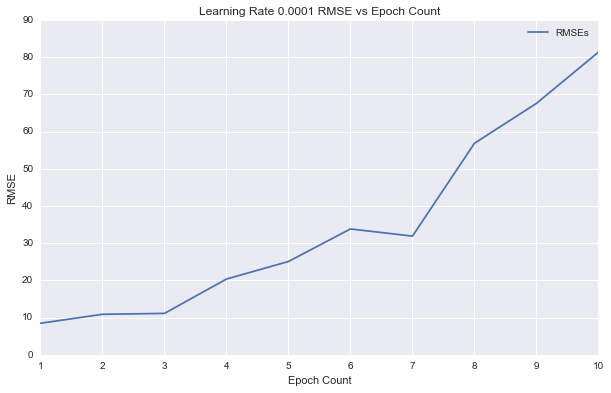

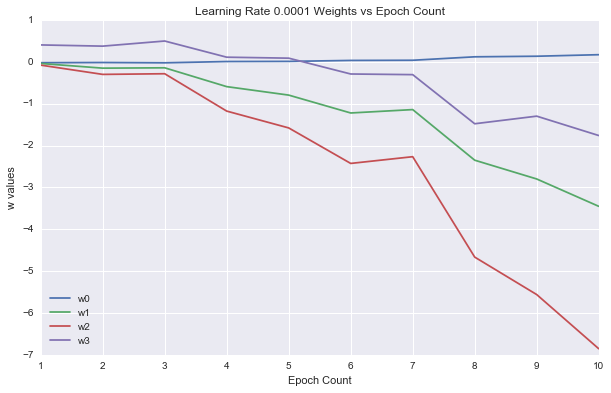

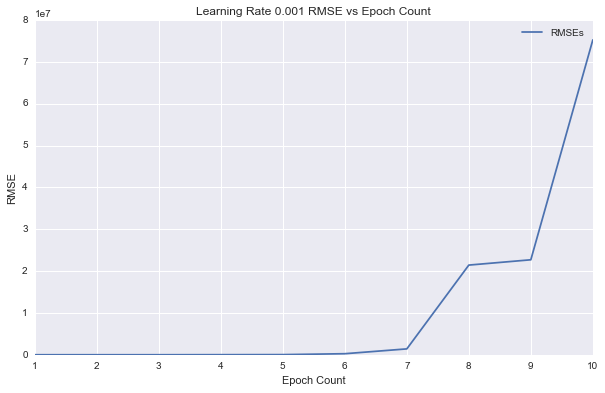

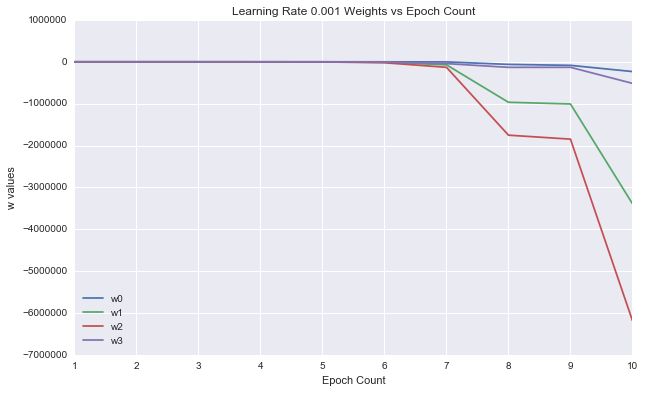

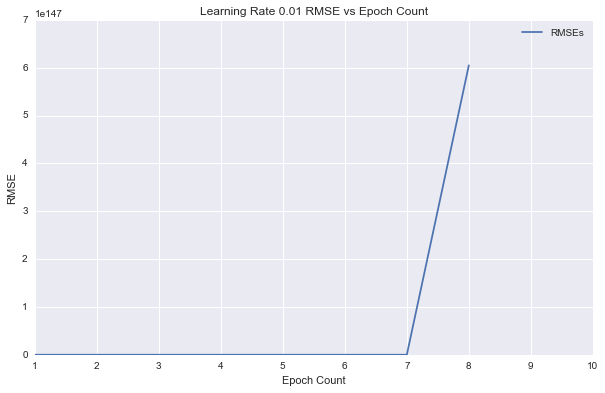

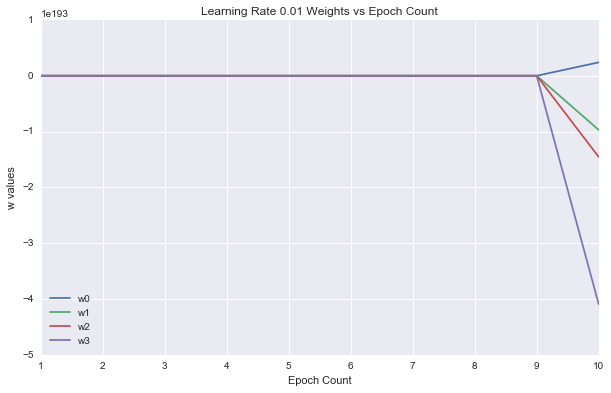

In [200]:
for learn_rate in learning_rate_arr:
    RMSEs = []
    ws = []
    for epoch in epoch_count:
        g = GradientDescent()
        g.fit(sample_matrix[:,0:2],sample_matrix[:,2:],learn_rate,epoch,sample_p = 0.7)
        g.predict(sample_matrix[:,0:2])
        RMSEs.append(g.RMSE())
        ws.append(g.get_ws())
    RMSEs_df = pd.DataFrame([epoch_count,RMSEs])
    RMSEs_df = RMSEs_df.T
    RMSEs_df.columns = ["epoch_count","RMSEs"]
    RMSEs_df.plot(x="epoch_count",y="RMSEs",title = "Learning Rate {} RMSE vs Epoch Count".format(learn_rate))
    xlabel("Epoch Count")
    ylabel("RMSE")
    
    plt.show()
    
    ws_df = pd.DataFrame(ws)
    ws_df.columns = ["w0","w1","w2","w3"]
    ws_df["Epoch Count"] = epoch_count
    ws_df = ws_df.set_index("Epoch Count")
    
    ws_df.plot()
    #x="epoch_count",y=["w0","w1","w2","w3"],title = "Learning Rate {}".format(learn_rate))
    xlabel("Epoch Count")
    ylabel("w values")
    title("Learning Rate {} Weights vs Epoch Count".format(learn_rate))
    
    plt.show()
    print
    

In [132]:
ws_df = pd.DataFrame(ws)
ws_df.columns = ["w0","w1","w2","w3"]
ws_df["Epoch Count"] = epoch_count
ws_df

,w0,w1,w2,w3,Epoch Count
0,2.302695e+08,-1.729191e+09,-3.458381e+09,-8.675976e+08,1
1,7.545463e+19,4.106583e+18,8.213166e+18,-9.437037e+20,2
2,2.071694e+34,3.984703e+34,7.969407e+34,-2.809016e+35,3
3,-4.614859e+39,2.279765e+40,4.559530e+40,5.102538e+40,4
4,-1.477656e+51,4.066913e+51,8.133825e+51,2.840802e+52,5
5,-2.189608e+61,-6.364200e+61,-1.272840e+62,1.884789e+62,6
6,-3.866947e+71,1.133302e+72,2.266603e+72,7.408505e+72,7
7,3.006642e+76,-1.348732e+77,-2.697464e+77,-8.096419e+77,8
8,-5.947319e+98,3.456291e+99,6.912583e+99,7.431876e+99,9
9,-1.780274e+97,1.033038e+98,2.066077e+98,2.736671e+98,10


# Question 2: Gradient Descent (5 pts)

Suppose we are trying to use gradient descent to minimize a cost function y = f(w) as shown in the figure below. This function is linearly decreasing between A and B, constant between B and C, quadratic between C and D and constant between D and E. Assume that we have 10000 data points in our training set. If we choose the starting point between B and C, will we be able to find the local minima? Explain your answer. If your answer is "Yes", can you give a bound on the number of iterations required to get to the local minima?

<img src="sgd.png">

$\textbf{Short answer:}$ It does not find the local minima.


$\textbf{Long answer:}$


For some learning rate $\eta$, the gradient descent procedes in a step wise fashion where $w^{(\tau+1)} = w^{(\tau)} + \eta \nabla f(w)$, where $\tau \in N$. 

Note that  $\forall w_0,w_1$ where $B < w_0,w_1 < C$, the graph shows $f(w_0)=f(w_1)$. 

So it follows that $f(w_0)-f(w_1)=0$.

This implies that $\frac{f(w_0)-f(w_1)}{w_0-w_1}=\frac{0}{w_0-w_1}=0.$ So $\frac{f(w_0)-f(w_1)}{w_0-w_1}=0.$

So $\lim_{w_1 \to w_0}\frac{f(w_0)-f(w_1)}{w_0-w_1}=0$.

By definition of derivative, it follows that $\forall w$ where $B < w < C$, $\frac{d f(w)}{d w}=0.$

By definition of gradient, in this case $\nabla f(w) = \frac{d f(w)}{d w}=0$. So $\nabla f(w)=0.$

Thus the gradient descent equation becomes $w^{(\tau+1)} = w^{(\tau)} + \eta \nabla f(w)= w^{(\tau)} + \eta*0 = w^{(\tau)}$.  

So $\forall \tau$, $w^{(\tau+1)} = w^{(\tau)}$.

---

---

$\textbf{Lemma:}$  If $\forall \tau \in N$, $w^{(\tau+1)} = w^{(\tau)}$, then $\forall \epsilon, \tau \in N$,  $w^{(\tau)} = w^{(\epsilon)}$.

Proof by Induction

---

#### Case 1: $\epsilon > \tau$

Basis $\forall \tau_0$, $\tau_0 = \tau_0$, so $w^{(\tau_0)}=w^{(\tau_0)}$
    
Inductive Step:

Inductive Hypothesis: Suppose $\epsilon = \tau_0 + 1$. It follows that $w^{(\epsilon)} = w^{(\tau_0 + 1)} = w^{(\tau_0)}$.

For $\epsilon = \tau_0 + 2$, define $\tau_1 = \tau_0 + 1$, it follows that $\epsilon = \tau_1 + 1$. So $w^{(\epsilon)} = w^{(\tau_1 + 1)} = w^{(\tau_1)} = w^{(\tau_0 + 1)} = w^{(\tau_0)} $.

$\therefore$ By induction, $\forall \epsilon > \tau \in N$, $w^{(\tau )}= w^{(\epsilon)}$.

---

#### Case 2: $\epsilon < \tau$ :

Basis $\forall \tau_0$, $\tau_0 = \tau_0$, so $w^{(\tau_0)}=w^{(\tau_0)}$
    
Inductive Step:

Inductive Hypothesis: Suppose $\epsilon = \tau_0 - 1$. Then $\epsilon + 1 = \tau_0$. So $w^{(\epsilon + 1)} = w^{(\tau_0)}$.

For $\epsilon = \tau_0 - 2$, define $\tau_1 = \tau_0 - 1$, it follows that $\epsilon = \tau_1 - 1$, so $\epsilon + 1 = \tau_1$. So $w^{(\epsilon + 1)} = w^{(\tau_1)} = w^{(\tau_1 + 1)} = w^{((\tau_0 - 1) + 1)} = w^{(\tau_0)} $.

$\therefore$ By induction, $\forall \epsilon < \tau \in N$, $w^{(\tau )}= w^{(\epsilon)}$.


---

#### Case 3: $\epsilon = \tau$:

Clearly, if $\epsilon = \tau$, since $w^{(\tau)} = w^{(\tau)}$, it follows that $w^{(\tau)} = w^{(\epsilon)}$.

$\therefore w^{(\tau)} = w^{(\epsilon)}$


---

#### $\therefore$ $\forall \tau \in N$, if $w^{(\tau+1)} = w^{(\tau)}$, then $\forall \epsilon, \tau \in N$,  $w^{(\tau)} = w^{(\epsilon)}$.

---

---


$\therefore$ For any starting point between A and B exclusive, every subsequent iteration will yield that same point. Since every point between A and B exclusive is not itself the local minima, no iteration will never yield a point that equals the local minima.

# Question 3: Multi-layer Perceptron regressor (15 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the same dataset used in HW2 Q5: Hitters.csv [here](https://rdrr.io/cran/ISLR/man/Hitters.html). 

Following code will load and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('Hitters.csv')
label_name = 'Salary'
y = data[label_name]
X = data.drop(label_name,axis=1)
print X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

1) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.001
    
Now, consider two different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (15,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a) and (b) (6pts)
   
   
2) Now, using the same parameters used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works better, (a) or (b)? Briefly analyze the result in terms of the number of hidden units. (5pts)


3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each iteration. For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot two curves for model (a) and (b) in one figure, where *X-axis* is iteration number and *Y-axis* is squared root of *loss\_curve\_* value. (4pts)

# Question 4 - Bayesian Classifiers (10 pts)

Download the Smarket dataset from Canvas. This contains about four years worth of daily prices for one stock. The goal is to predict whether or not the stock price will go up or down, and the features are the stock prices of the last five days.  
The code below loads the dataset and all necessary sklearn modules (not that you can't use more if you feel like it). Look up any module on the scikit-learn website for a full description.

1. The last 50 points will be the test dataset. For training, use the 1000 points prior to these 50 test points.
2. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the stock price going up for each row in the test set.
3. Plot the receiver operating characteristic (ROC) curve of each model, using the extracted probabilities and the true values for the test set. (3 pts)
4. Report the area under the ROC curve (AUC) for each model. (2 pts)
6. Justify the performance of each model, relative to the others. (1 pts)
7. Repeat steps 1-6, only using the prior 100 points for training. Explain the changes in model performance. (4 pts)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
data = pd.read_csv('Smarket.csv', usecols=['Lag1','Lag2','Lag3','Lag4','Lag5','Direction'])

# Question 5 - Logistic Regression (15pts)

In this question we will be predicting mile per gallon (mpg) for Auto data set. ('Auto.csv' in Canvas)
1. Convert mpg to a binary variable mpg01 which is 1 if had an mpg is greater than median mpg and zero otherwise
2. Split the data into training and test. Use 42 as random seed and use 1/3rd of the data for testing. Our y variable is mpg01 and X matrix includes all the other variables except mpg01.
3. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "mpg01 = 0" class, the "mpg01 = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.
4. Repeat step 3 except use l2 penalty with Cs of [0.001,0.01, 0.1, 1, 10 ,100, 1000]. You will want to use k-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).
5. Repeat question 4 except use l1 instead of l2 as the penalty type, use Cs of  [0.001, 0.01, ..., 1000]
6. Which model produces the best average per-class accuracy? Why do you think this is the case? How do the models handle the different classes, and why is this so?

Following code will load and clean the dataset and load some useful functions

In [ ]:
import pandas as pd
import numpy as np

from sklearn import cross_validation
# from sklearn import model_selection # Use model_selection instead of cross_validation in sklearn version >=0.18
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.grid_search import GridSearchCV

Auto = pd.read_csv('Auto.csv', na_values='?').drop('name',axis = 1).dropna()
Auto.head(5)

# Question 6: House Prices (kaggle competition) (25 pts)

In this problem, we are going to explore a kaggle competition: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Your goal is to obtain the best score you can in this competition. This is an ongoing competition, and you have the opportunity to win the prize money! 

The first step is to make a Kaggle account. Then find the House Prices competition and read the competition details and the description of the dataset. You may find this [article](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf) useful.

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any skewed features and consider applying suitable transformation techniques to make them more "normal").
 * Impute the missing values (if any).
2. Predictive Models. 
 * You have to create at least three models: simple linear regression, Lasso and Ridge regression and multilayer perceptron. You may consider creating an ensemble of these models as well (optional). For Lasso and Ridge regression, optimize the alphas using cross validation. You may try other predictive models to get better scores (optional).
3. Evaluation: submit your model to kaggle submission site and report the public score.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!

# Preprocessing

In [25]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import seaborn as sns
%matplotlib inline

In [26]:
train = pd.read_csv("Kaggle Data\\train.csv")
test = pd.read_csv("Kaggle Data\\test.csv")
test_df_copy = test.copy()

In [27]:
train_Ydf = train["SalePrice"]

In [28]:
train_Xdf = train.copy()
del train_Xdf["SalePrice"]

In [29]:
train_Xdf2 = pd.get_dummies(train_Xdf)

In [239]:
imp = Imputer()
train_Xdf2 = imp.fit_transform(train_Xdf2)

In [ ]:
test_dummies = pd.get_dummies(test_df_copy)
imp = Imputer()
test_mat = imp.fit_transform(test_dummies)

### Finding missing values

In [204]:
for i in train_Xdf2.columns:
    num_Nan = sum(1*(train_Xdf2.apply(lambda row: str(row[i])=='nan',axis = 1)))
    if num_Nan > 0:
        print i
        print num_Nan

### Interpreting Missing Values:

#### Missing Masonry Vaneer Area Values

In [31]:
train_Xdf2[["MasVnrType_BrkCmn",\
            "MasVnrType_BrkFace",\
            "MasVnrType_None",\
            "MasVnrType_Stone"]][train_Xdf2["MasVnrArea"].map(lambda x: str(x)=='nan')]

,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
234,0.0,0.0,0.0,0.0
529,0.0,0.0,0.0,0.0
650,0.0,0.0,0.0,0.0
936,0.0,0.0,0.0,0.0
973,0.0,0.0,0.0,0.0
977,0.0,0.0,0.0,0.0
1243,0.0,0.0,0.0,0.0
1278,0.0,0.0,0.0,0.0


#### Analysis of missing MasVnrArea data:
It seems that when the "MasVnrArea" column == NaN, there is no indication of what type of masonry vaneer is used. Perhaps, it was not noted because it was not there.

#### Cleaning data steps:
Setting the values equal to zero where missing would solve the problem, as they were probably supposed to be entered as zeros to begin with.

In [32]:
train_Xdf2["MasVnrArea"] = train_Xdf2["MasVnrArea"].map(lambda x: x if str(x)!='nan' else 0)

#### Garage Year Built Missing Values

In [33]:
garage_checkdf = train_Xdf2[['GarageCars','GarageArea',\
            'GarageType_2Types','GarageType_Attchd',\
            'GarageType_Basment','GarageType_BuiltIn',\
            'GarageType_CarPort','GarageType_Detchd',\
            'GarageFinish_Fin','GarageFinish_RFn',\
            'GarageFinish_Unf','GarageQual_Ex',\
            'GarageQual_Fa','GarageQual_Gd',\
            'GarageQual_Po','GarageQual_TA','GarageCond_Ex',\
            'GarageCond_Fa','GarageCond_Gd','GarageCond_Po',\
            'GarageCond_TA']][train_Xdf2["GarageYrBlt"].map(lambda x: str(x)=='nan')]


In [34]:
garage_checkdf.apply(lambda column: sum(column))

GarageCars            0.0
GarageArea            0.0
GarageType_2Types     0.0
GarageType_Attchd     0.0
GarageType_Basment    0.0
GarageType_BuiltIn    0.0
GarageType_CarPort    0.0
GarageType_Detchd     0.0
GarageFinish_Fin      0.0
GarageFinish_RFn      0.0
GarageFinish_Unf      0.0
GarageQual_Ex         0.0
GarageQual_Fa         0.0
GarageQual_Gd         0.0
GarageQual_Po         0.0
GarageQual_TA         0.0
GarageCond_Ex         0.0
GarageCond_Fa         0.0
GarageCond_Gd         0.0
GarageCond_Po         0.0
GarageCond_TA         0.0
dtype: float64

#### Analysis of missing garage year built data:

A missing value seems to indicate the lack of a garage. 

#### Cleaning:

Setting the value equal to the value of the house being built where it is not otherwise indicated would provide a value needed for classification.

In [35]:
train_Xdf2[["GarageYrBlt"]] = train_Xdf2[["GarageYrBlt",\
                            'YearBuilt']].apply(lambda row: row["YearBuilt"]\
                                                if row["GarageYrBlt"]!='nan' \
                                                else row["GarageYrBlt"],axis=1)

### Lot Frontage Missing Values

In [36]:
train_Xdf2[['Street_Grvl','Street_Pave']][train_Xdf2["LotFrontage"].map(lambda x: str(x)=='nan')].head()

,Street_Grvl,Street_Pave
7,0.0,1.0
12,0.0,1.0
14,0.0,1.0
16,0.0,1.0
24,0.0,1.0


The lot frontage indicates the linear feet of street connected to the property. It seems as though there is street connected to the properties in question, though no indication of square footage is given.

A model (below) was built in order to classify these missing terms.

In [38]:
lot_frontage_train = train_Xdf2[train_Xdf2["LotFrontage"].map(lambda x: str(x)!='nan')]
lot_frontage_test = train_Xdf2[train_Xdf2["LotFrontage"].map(lambda x: str(x)=='nan')]

In [39]:
lot_frontage_train_Xmat = lot_frontage_train.drop(["LotFrontage"],axis=1).as_matrix()
lot_frontage_test_Xmat = lot_frontage_test.drop(["LotFrontage"],axis=1).as_matrix()

In [40]:
lot_frontage_train_Ymat = lot_frontage_train[["LotFrontage"]].as_matrix()

In [41]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [42]:
lfc = knn()

In [43]:
lfc.fit(lot_frontage_train_Xmat,lot_frontage_train_Ymat)

C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [44]:
y_pred_arr = lfc.predict(lot_frontage_test_Xmat)

In [45]:
y_pred_arr = lfc.predict(lot_frontage_test_Xmat)
y_pred_series = pd.Series(y_pred_arr)

In [46]:
fixing_lot = train_Xdf2[train_Xdf2["LotFrontage"].map(lambda x: str(x)=='nan')]["LotFrontage"].reset_index() 
fixing_lot["LotFrontage"] = y_pred_series

In [47]:

for row_num in range(len(train_Xdf2["LotFrontage"])):
    if str(train_Xdf2["LotFrontage"][row_num]) == 'nan':
        train_Xdf2["LotFrontage"][row_num] = y_pred_arr[counter]


C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### A final check to ensure no missing values are present:

In [48]:
NaN_arr = []
for i in train_Xdf2.columns:
    num_Nan = sum(1*(train_Xdf2.apply(lambda row: str(row[i])=='nan',axis = 1)))
    if num_Nan > 0:
        print i
        print num_Nan
        NaN_arr.append(i)
if len(NaN_arr)==0:
    print "All rows of all columns have values."

All rows of all columns have values.


### Data Normalization

Below is a a string containing all the column names that, by their discriptions, seem non-categorical.

In [49]:
m = '''LotFrontage: 
LotArea: 
YearBuilt: 
YearRemodAdd: 
MasVnrArea: 
BsmtFinSF1: 
BsmtFinSF2: 
BsmtUnfSF: 
TotalBsmtSF: 
1stFlrSF:
2ndFlrSF:
LowQualFinSF: 
GrLivArea: 
BsmtFullBath: 
BsmtHalfBath: 
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
KitchenAbvGr: Kitchens above grade
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Fireplaces: Number of fireplaces
GarageYrBlt: Year garage was built
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold (MM)
YrSold: Year Sold (YYYY)'''


In [50]:
non_cat_col = []
for line in m.split('\n'):
    column = ""
    for char in line:
        if char == ":":
            break
        column = column + char

    non_cat_col.append(column)

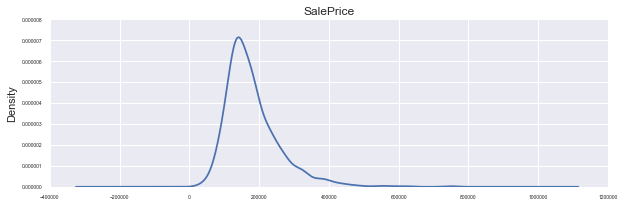

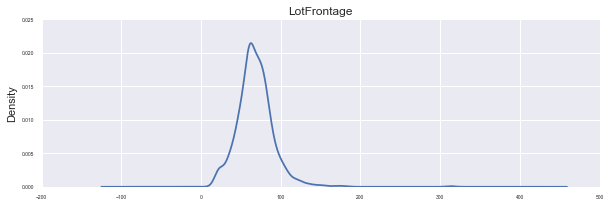

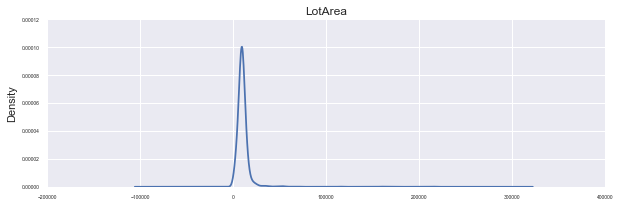

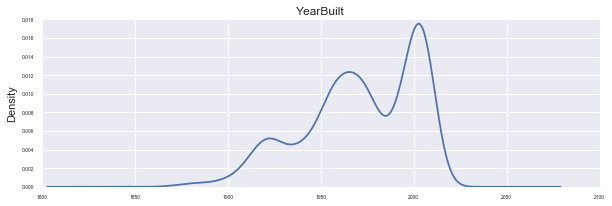

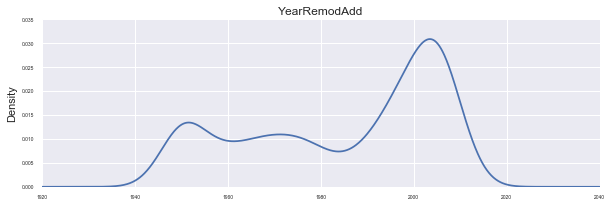

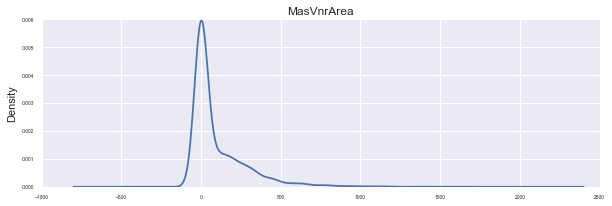

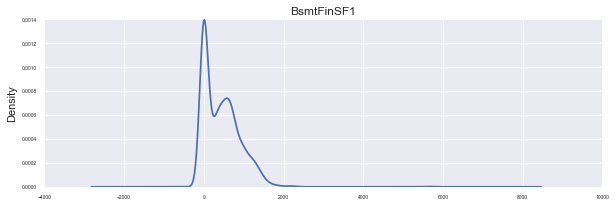

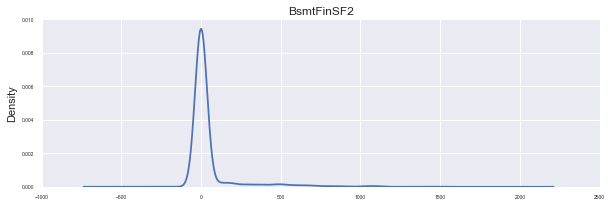

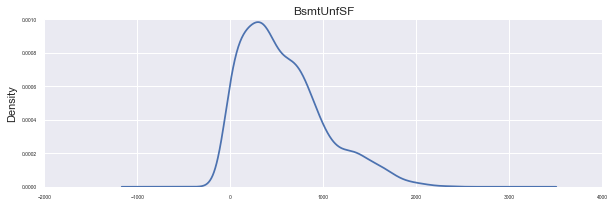

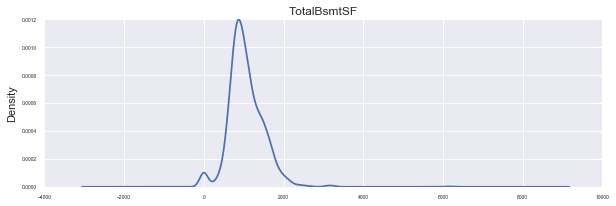

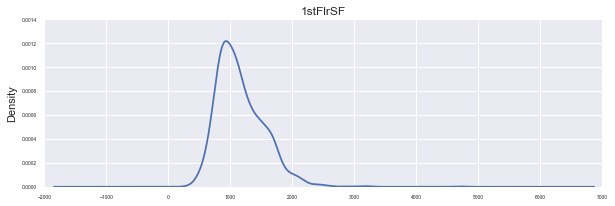

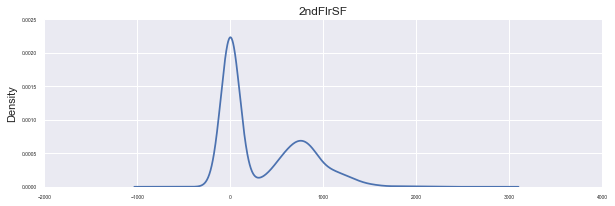

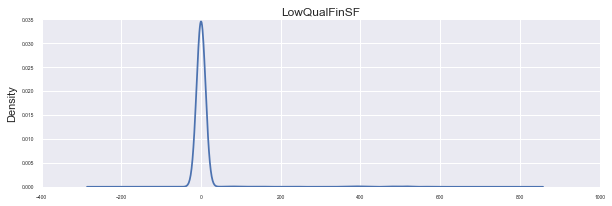

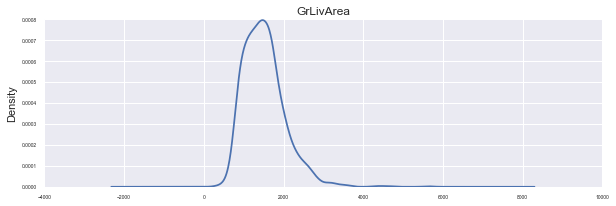

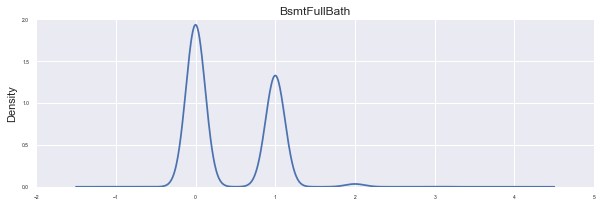

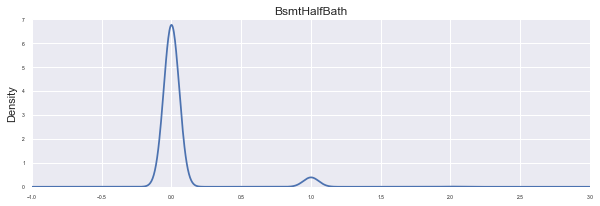

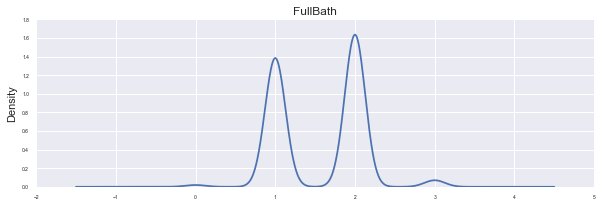

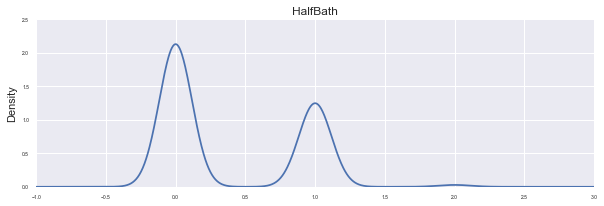

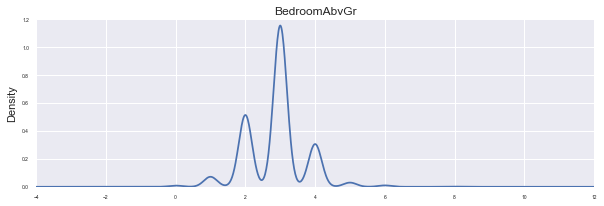

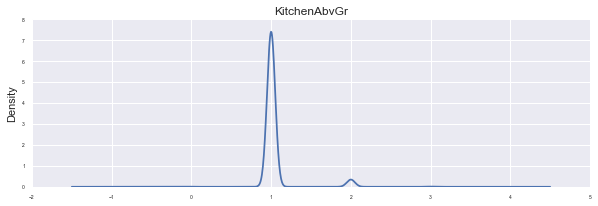

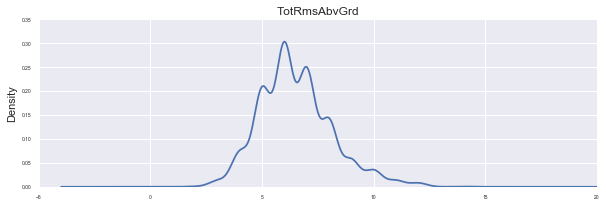

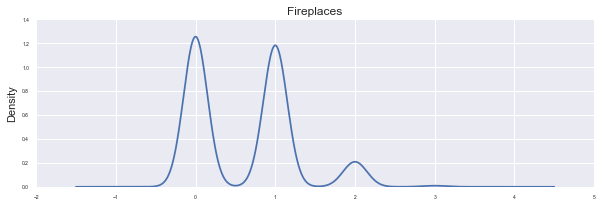

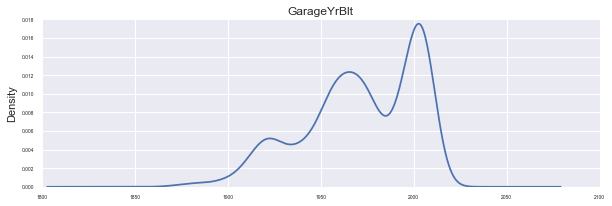

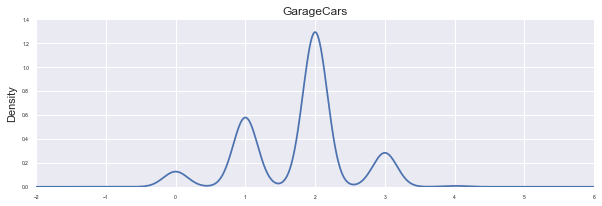

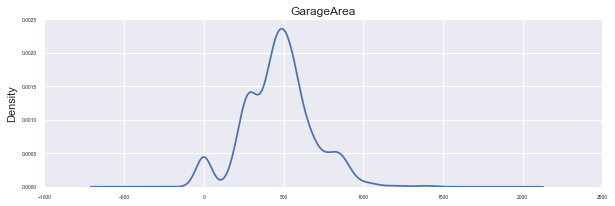

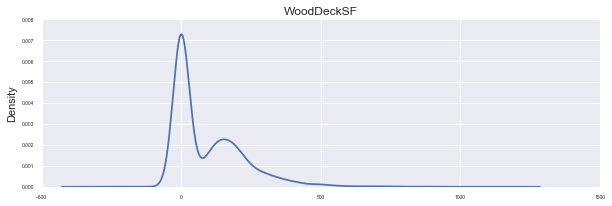

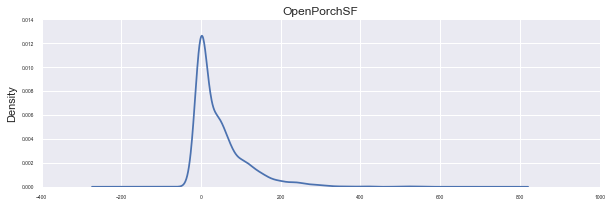

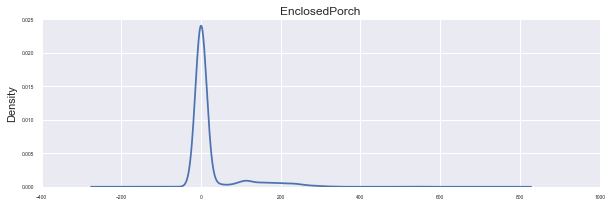

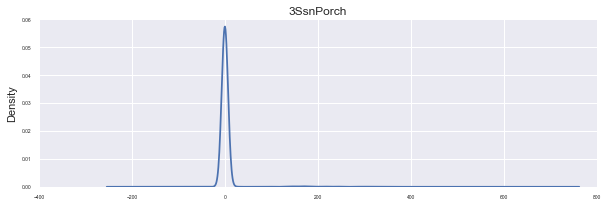

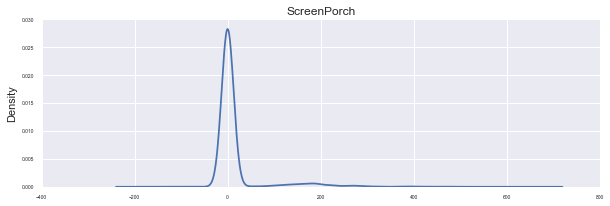

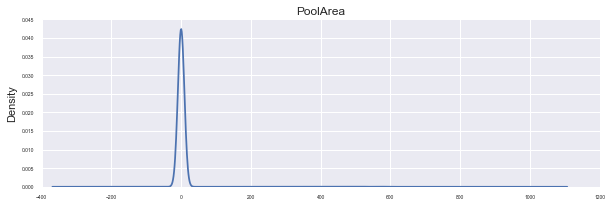

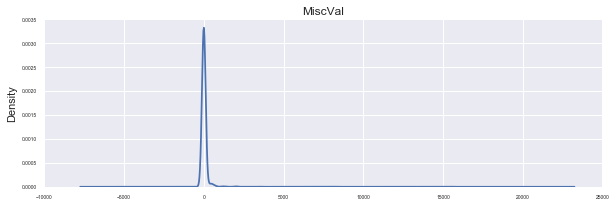

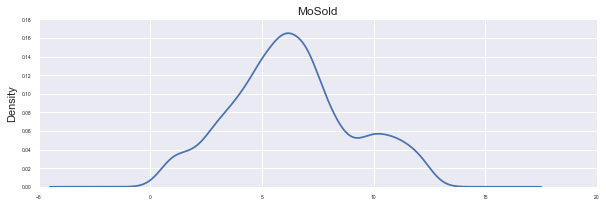

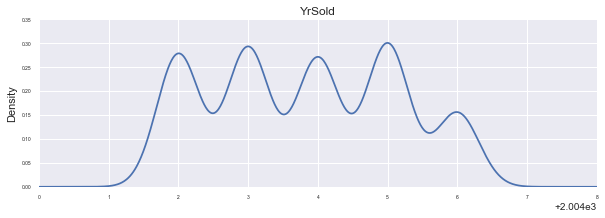

In [51]:
import matplotlib.pyplot as plt
train['SalePrice'].plot(kind='density',figsize=(10,3),fontsize=5, title = 'SalePrice')
plt.show()
for col in non_cat_col:
    train_Xdf2[col].plot(kind='density',figsize=(10,3),fontsize=5, title = col)
    #axs[i].set_title('{}'.format(col))
    #i = i+1
    plt.show()

In [52]:
skewed_str = '''* GarageYrBlt
* YearBuilt
* YearRemodAdd
* MasVnrArea
* BsmtFinSF1
* BsmtUnfSF
* 1stFlrSF
* 2ndFlrSF
* WoodDeckSF
* OpenPorchSF'''

In [53]:
skewed_col = []
for i in skewed_str.split('\n'):
    skewed_col.append(i[2:])

In [54]:
for col in skewed_col:
    train_Xdf2[col] = train_Xdf2[col].apply(lambda x: np.log(x) if x!= 0 else 0)

In [55]:
train_Ydf = train_Ydf.apply(lambda x: np.log(x) if x!= 0 else 0)

In [56]:
ind = []
for value in train_Xdf2.columns:
    ind.append(value)
for col in skewed_col:
    for i in range(len(train_Xdf2.columns)):
        if train_Xdf2.columns[i]== col:
            st = "Log"
            st = st + col
            ind[i] = st

In [57]:
train_Xdf2.columns = ind

In [58]:
train_Xdf2 = train_Xdf2.drop(["Id"],axis=1)

# 2.

2: Predictive Models. 
 * You have to create at least three models: simple linear regression, Lasso and Ridge regression and multilayer perceptron. You may consider creating an ensemble of these models as well (optional). For Lasso and Ridge regression, optimize the alphas using cross validation. You may try other predictive models to get better scores (optional).

## Linear Regression:

In [212]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.cross_validation import train_test_split

train_Xmat = train_Xdf2.as_matrix()
train_Ymat = train_Ydf.as_matrix()

In [213]:
X_train, X_test, y_train, y_test = train_test_split(train_Xmat, train_Ymat, test_size = 0.3)

In [214]:
lin_reg = LR()

In [215]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [216]:
y_test_pred = lin_reg.predict(X_test)

In [217]:
print "R^2 of model is: ", lin_reg.score(X_test,y_test)
print "Out of sample RMSE: ",round(np.sqrt(sum(((np.exp(y_test) - np.exp(y_test_pred))**2)/float(len(y_test)))),1)

R^2 of model is:  0.860130563035
Out of sample RMSE:  42783.8


Note that the model predicts the log price (as the price distribution is skewed), so to calculate the MSE, the exponential of both the test and the prediction is taken

## Lasso:

In [218]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV as las

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


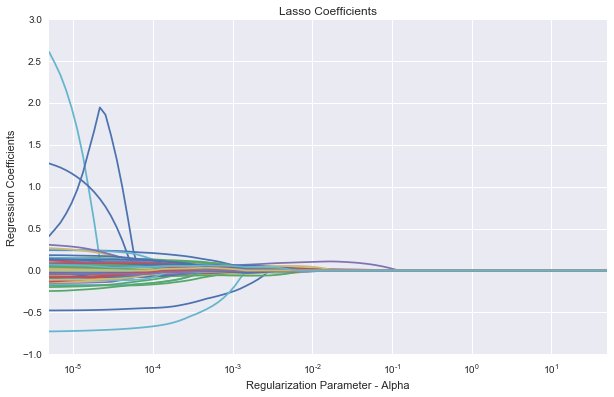

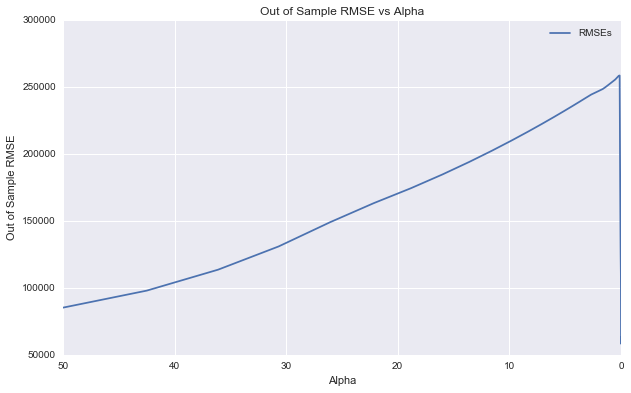

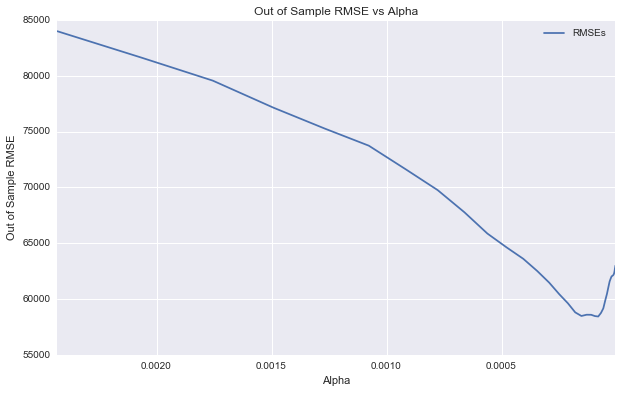

In [219]:
%pylab inline
alphas = 10**np.linspace(2,-5,100)*0.5
df_coefs = pd.DataFrame(np.nan, index = alphas, columns = train_Xdf2.columns.values)

# Lasso Regression

## Initialize lasso model 
lasso = linear_model.Lasso()
## Initialize dataframe to store lasso coefficients
lasso_coefs = df_coefs
## alphas and MSEs:
RMSEs = []
## Fill dataframe with regression coefficients for each value of alpha
for alpha in alphas:
    lasso.alpha = alpha
    lasso.fit(X_train, y_train)
    lasso_coefs.loc[alpha] = lasso.coef_
    lasso_y_test_pred = lasso.predict(X_test)
    RMSEs.append(round(np.sqrt(sum(((np.exp(y_test) - np.exp(lasso_y_test_pred))**2)/float(len(y_test)))),1))

## Plot alpha vs. the value of each coefficients
plt.figure(figsize(10,6))
lasso_coefs.plot(logx=True)
#legend(loc=2, ncol=4)
plt.legend().set_visible(False)
xlim([alphas[-1], alphas[0]])
title('Lasso Coefficients')
xlabel('Regularization Parameter - Alpha')
ylabel('Regression Coefficients')
## Indicate best regularization parameter
#plt.axvline(lasso_alpha, linestyle='--', color='.5')
plt.show()

rmse_alpha_df = pd.DataFrame([alphas,RMSEs])
rmse_alpha_df = rmse_alpha_df.T
rmse_alpha_df.columns = ["Alphas","RMSEs"]
rmse_alpha_df.plot(x="Alphas",y="RMSEs", title = "Out of Sample RMSE vs Alpha")
xlabel('Alpha')
ylabel('Out of Sample RMSE')
plt.show()

rmse_alpha_df[rmse_alpha_df["Alphas"]<0.0025].plot(x="Alphas",y="RMSEs", title = "Out of Sample RMSE vs Alpha")
xlabel('Alpha')
ylabel('Out of Sample RMSE')
plt.show()

In [220]:
rmse_alpha_df = rmse_alpha_df.set_index(["Alphas"])

In [221]:
print "At an alpha of ",rmse_alpha_df["RMSEs"].idxmin(),\
                              ", the lasso regression achieves its lowest out of sample RMSE of ",rmse_alpha_df["RMSEs"].min()
print "As expected, this is also around the point at which the regularization plot stops its steep descent to 0 as alpha increases."

At an alpha of  7.96141396671e-05 , the lasso regression achieves its lowest out of sample RMSE of  58431.4
As expected, this is also around the point at which the regularization plot stops its steep descent to 0 as alpha increases.


# Ridge

Populating the interactive namespace from numpy and matplotlib


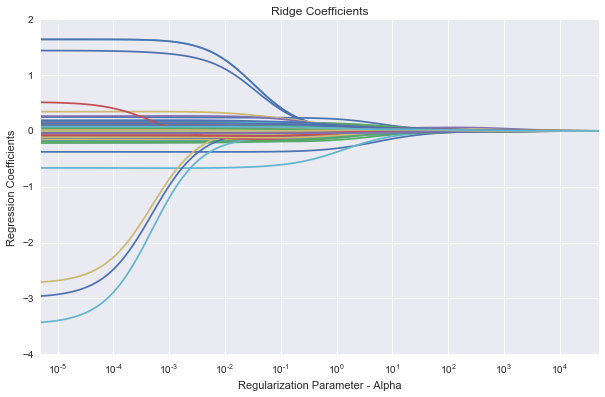

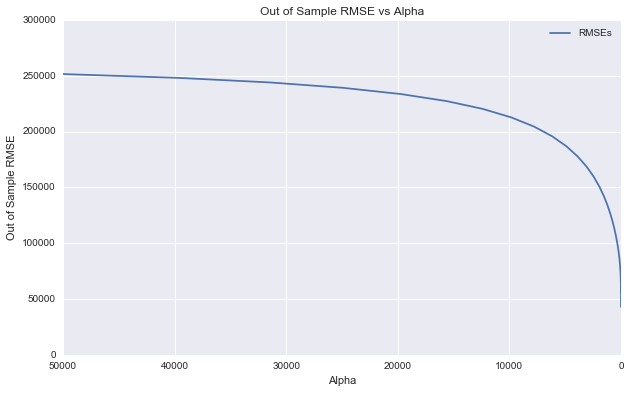

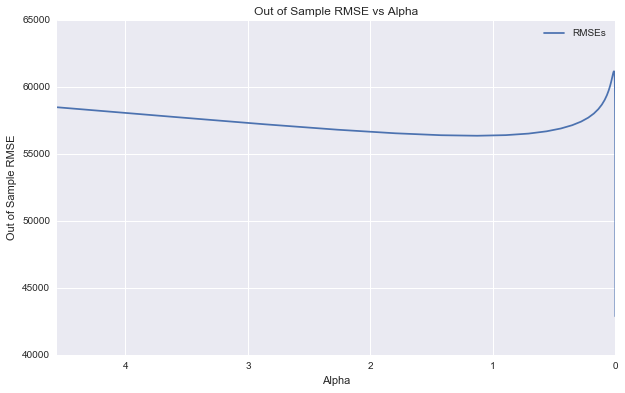

In [222]:
%pylab inline
alphas = 10**np.linspace(5,-5,100)*0.5
df_coefs = pd.DataFrame(np.nan, index = alphas, columns = train_Xdf2.columns.values)

# Lasso Regression

## Initialize lasso model 
ridge = linear_model.Ridge()
## Initialize dataframe to store lasso coefficients
ridge_coefs = df_coefs
## alphas and MSEs:
RMSEs = []
## Fill dataframe with regression coefficients for each value of alpha
for alpha in alphas:
    ridge.alpha = alpha
    ridge.fit(X_train, y_train)
    ridge_coefs.loc[alpha] = ridge.coef_
    ridge_y_test_pred = ridge.predict(X_test)
    RMSEs.append(round(np.sqrt(sum(((np.exp(y_test) - np.exp(ridge_y_test_pred))**2)/float(len(y_test)))),1))

    
## Plot alpha vs. the value of each coefficients
plt.figure(figsize(10,6))
ridge_coefs.plot(logx=True)
#legend(loc=2, ncol=4)
plt.legend().set_visible(False)
xlim([alphas[-1], alphas[0]])
title('Ridge Coefficients')
xlabel('Regularization Parameter - Alpha')
ylabel('Regression Coefficients')
## Indicate best regularization parameter
#plt.axvline(lasso_alpha, linestyle='--', color='.5')
plt.show()

rmse_alpha_df = pd.DataFrame([alphas,RMSEs])
rmse_alpha_df = rmse_alpha_df.T
rmse_alpha_df.columns = ["Alphas","RMSEs"]
rmse_alpha_df.plot(x="Alphas",y="RMSEs", title = "Out of Sample RMSE vs Alpha")
xlabel('Alpha')
ylabel('Out of Sample RMSE')
plt.show()

rmse_alpha_df["Alphas1"] =  rmse_alpha_df["Alphas"]
rmse_alpha_df = rmse_alpha_df.set_index(["Alphas"])

rmse_alpha_df[rmse_alpha_df["Alphas1"]<(round(2*rmse_alpha_df2["RMSEs"].idxmin(),2))].plot(x="Alphas1",y="RMSEs", title = "Out of Sample RMSE vs Alpha")
xlabel('Alpha')
ylabel('Out of Sample RMSE')
plt.show()


In [223]:
rmse_alpha_df.index

Float64Index([          50000.0,     39624.1449177,     31401.4572092,
                  24885.1178217,     19721.0302972,     15628.5792484,
                    12385.38178,      9815.2032502,     7778.38071965,
                  6164.23369721,      4885.0497865,     3871.31841341,
                  3067.95363671,     2431.30079003,     1926.76429686,
                  1526.92775442,      1210.0641324,     958.955130836,
                  759.955541476,     602.251770129,     477.274228331,
                  378.231663777,     299.742125159,     237.540508105,
                   188.24679034,     149.182362014,     118.224470632,
                   93.690871143,     74.2484131127,     58.8405976217,
                  46.6301673442,     36.9536101676,     29.2851040903,
                  23.2079441681,     18.3918988591,     14.5752653141,
                  11.5506485004,     9.15369140148,     7.25414389248,
                  5.74878497699,     4.55581378058,     3.61040450919,
      

In [226]:
print "At an alpha of ",rmse_alpha_df["RMSEs"].idxmin(),", the lasso regression achieves its lowest out of sample RMSE of ",rmse_alpha_df["RMSEs"].min()
print "As expected, this alpha appears around the part of the ridge regularization curve at which coefficients are not"
print "varying greatly, but are also not regularized to the extent that they are essentially zero."

At an alpha of  5e-06 , the lasso regression achieves its lowest out of sample RMSE of  42873.4
As expected, this alpha appears around the part of the ridge regularization curve at which coefficients are not
varying greatly, but are also not regularized to the extent that they are essentially zero.


In [225]:
from sklearn.preprocessing import Imputer
test_dummies = pd.get_dummies(test_df_copy)
imp = Imputer()
test_mat = imp.fit_transform(test_dummies)

In [227]:
ridge = linear_model.Ridge()
ridge.alpha = rmse_alpha_df["RMSEs"].idxmin()
ridge.fit(X_train, y_train)
ridge_coefs.loc[alpha] = ridge.coef_
ridge_y_test_pred = ridge.predict(test_mat)
ridge_y_test_pred

ValueError: shapes (1459,271) and (288,) not aligned: 271 (dim 1) != 288 (dim 0)